In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
train_pd=pd.read_csv("fashion-mnist_train.csv")
test_pd=pd.read_csv("fashion-mnist_test.csv")

print("Training data shape: ",train_pd.shape)
print("Testing data shape: ",test_pd.shape)

Training data shape:  (60000, 785)
Testing data shape:  (10000, 785)


In [4]:
train_pd.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [5]:
train_data=np.array(train_pd, dtype="float32")
test_data=np.array(test_pd, dtype="float32")

In [6]:
y_train=train_data[:,0]
x_train=train_data[:,1:]/255
x_train.shape

(60000, 784)

In [53]:
labels={0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",
       5:"Sandal", 6:"Shirt", 7:"Sneaker",8:"Bag",9:"Ankle boot"}
labels[4]

'Coat'

In [72]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images)==len(cls_true)==9
    
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3,wspace=2)
    #fig.figsize=(3,6)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape((28,28)))
        
        if cls_pred is None:
            label="True: {0}".format(labels[int(cls_true[i])])
            
        else:
            label="True: {0} \n Predicted: {1}".format(labels[int(cls_true[i])],labels[int(cls_pred[i])])
        
        
        ax.set_xlabel(label)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show() 

In [8]:
y_test=test_data[:,0]
x_test=test_data[:,1:]/255
x_test.shape

(10000, 784)

In [9]:
x_train,x_validate, y_train, y_validate=train_test_split(x_train,y_train,test_size=0.2, random_state=10)

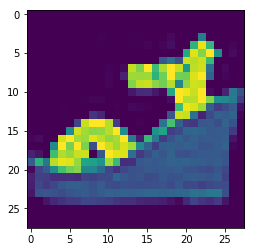

5.0

In [10]:
image=x_train[25,:].reshape((28,28))
plt.imshow(image)
plt.show()
y_train[25]

In [11]:
rows,cols=28,28
img_shape=(rows,cols,1)

x_train=x_train.reshape(x_train.shape[0], *img_shape)
x_test=x_test.reshape(x_test.shape[0], *img_shape)
x_validate=x_validate.reshape(x_validate.shape[0], *img_shape)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


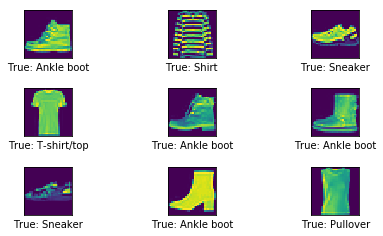

In [73]:
## Displaying images only

plot_images(x_train[:9],y_train[:9])

In [13]:
model=Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu',padding='same', input_shape=img_shape,strides=(2,2), name="Conv1"),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Conv2D(filters=64, kernel_size=3, activation='relu',padding='same',strides=(1,1), name="Conv2"),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Conv2D(filters=128, kernel_size=3, activation='relu',padding='same', strides=(1,1), name="Conv3"),
    Dropout(0.2),
    
    Flatten(name="flatten"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax", name="output")
    
])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 14, 14, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 3, 3, 128)         73856     
__________

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=Adam(),
             metrics=["accuracy"])

In [16]:
training=model.fit(x_train,y_train, batch_size=512, epochs=50,verbose=1, validation_data=(x_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 34s 703us/step - loss: 1.1175 - acc: 0.5777 - val_loss: 0.6369 - val_acc: 0.7660
Epoch 2/50
48000/48000 [==============================] - 8s 171us/step - loss: 0.6171 - acc: 0.7685 - val_loss: 0.5358 - val_acc: 0.8034
Epoch 3/50
48000/48000 [==============================] - 8s 172us/step - loss: 0.5299 - acc: 0.8025 - val_loss: 0.4416 - val_acc: 0.8389
Epoch 4/50
48000/48000 [==============================] - 8s 174us/step - loss: 0.4741 - acc: 0.8251 - val_loss: 0.4023 - val_acc: 0.8589
Epoch 5/50
48000/48000 [==============================] - 8s 173us/step - loss: 0.4397 - acc: 0.8390 - val_loss: 0.3720 - val_acc: 0.8690
Epoch 6/50
48000/48000 [==============================] - 8s 174us/step - loss: 0.4126 - acc: 0.8498 - val_loss: 0.3534 - val_acc: 0.8740
Epoch 7/50
48000/48000 [==============================] - 8s 171us/step - loss: 0.3943 - acc: 0.8558 - val_loss: 0.3414 -

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 14, 14, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 3, 3, 128)         73856     
__________

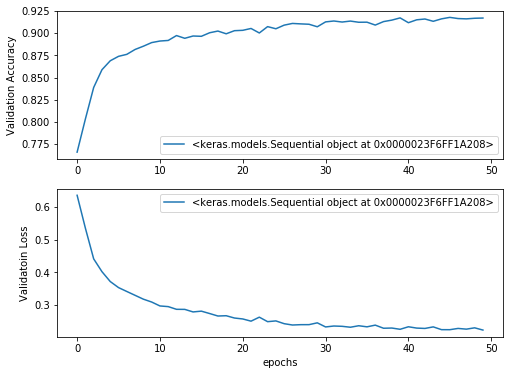

In [18]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(8,6))

val_acc=training.history['val_acc']
val_loss=training.history['val_loss']
ax1.plot(val_acc, label=model)
ax2.plot(val_loss, label=model)

ax2.set_xlabel("epochs")
ax1.set_ylabel("Validation Accuracy")
ax2.set_ylabel("Validatoin Loss")
ax1.legend()
ax2.legend()
plt.show()

In [19]:
layer1=model.layers[0]
layer2=model.layers[3]
layer3=model.layers[6]

In [20]:
weights1=layer1.get_weights()[0]
weights2=layer2.get_weights()[0]
weights3=layer3.get_weights()[0]

In [21]:
testing=model.evaluate(x=x_test, y=y_test)

10000/10000 [==============================] - 1s 116us/step


In [22]:
print(model.metrics_names[0]," : ",testing[0],"...", model.metrics_names[1]," : ",testing[1])

loss  :  0.213792811191082 ... acc  :  0.9232


In [23]:
pred=model.predict(x=x_test)

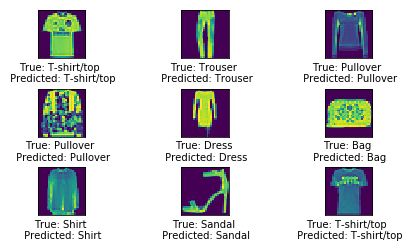

In [74]:
cls_pred=np.argmax(pred, axis=1)
cls_true=y_test

correct= (cls_true== cls_pred)

plot_images(x_test[correct][:9],y_test[correct][:9],cls_pred=cls_pred[correct][:9])

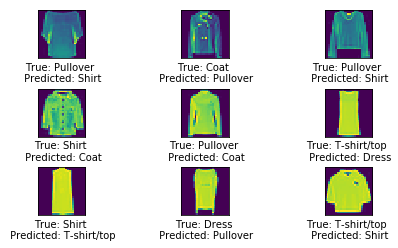

In [75]:
#incorrect

incorrect= (correct==False)

plot_images(x_test[incorrect][:9], y_test[incorrect][:9], cls_pred=cls_pred[incorrect][:9])


In [41]:
cm=confusion_matrix(y_true=cls_true, y_pred=cls_pred)
print(cm)

[[887   1  12  16   2   0  75   1   6   0]
 [  1 989   1   7   1   1   0   0   0   0]
 [ 19   0 878  11  48   0  43   0   1   0]
 [ 19   7   3 927  30   0  14   0   0   0]
 [  1   0  30  18 910   0  41   0   0   0]
 [  0   0   0   0   0 971   0  21   2   6]
 [118   0  49  17  66   0 749   0   1   0]
 [  0   0   0   0   0   6   0 973   0  21]
 [  1   1   1   1   2   3   4   0 986   1]
 [  0   0   0   0   0   1   0  37   0 962]]


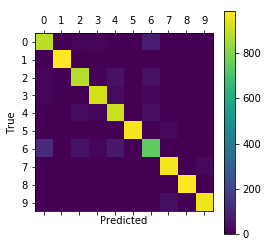

In [43]:
plt.matshow(cm)
plt.colorbar()
ticks=np.arange(10)
plt.xticks(ticks,range(10))
plt.yticks(ticks,range(10))
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()